<h1>Chapter 04. Training Models</h1>

<h2>Linear Regression</h2>

Linear Regression is a machine learning algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation, making it suitable for regression tasks.

<h3>The Normal Equation</h3>

The Normal Equation is a mathematical formula in linear regression used to find the optimal model parameters that minimize the sum of squared differences between observed and predicted values. 

In [1]:
import numpy as np


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

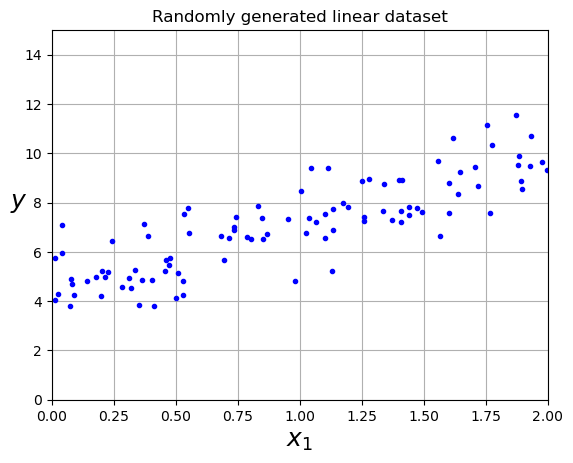

In [2]:
import matplotlib.pyplot as plt


plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title('Randomly generated linear dataset')
plt.grid(True)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.50699184],
       [2.66050534]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.50699184],
       [9.82800252]])

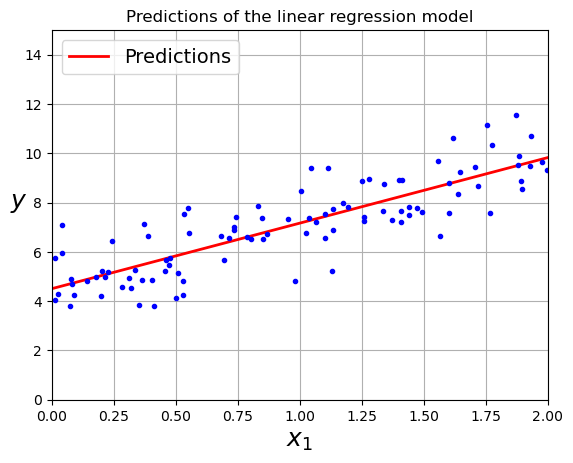

In [6]:
plt.plot(
    X_new,
    y_predict,
    'r-',
    linewidth=2,
    label='Predictions'
)
plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(loc='upper left', fontsize=14)
plt.title('Predictions of the linear regression model')
plt.grid(True)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate the intercept (bias) and coefficients for each feature in the linear model
lin_reg.intercept_, lin_reg.coef_

(array([4.50699184]), array([[2.66050534]]))

In [8]:
lin_reg.predict(X_new)

array([[4.50699184],
       [9.82800252]])

The `LinearRegression` class is based on the `numpy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.50699184],
       [2.66050534]])

<h2>Gradient Descent</h2>

Gradient Descent is an iterative optimization algorithm used in machine learning and mathematical optimization to minimize a cost or loss function. It works by repeatedly adjusting the parameters of a model in the direction of steepest descent of the function, aiming to find the minimum point where the function's gradient (derivative) is zero, effectively optimizing model performance or finding the best fit for data.

<h3>Batch Gradient Descent</h3>

Batch Gradient Descent is a version of the Gradient Descent algorithm that updates model parameters using the average gradient of the entire training dataset in each iteration, making it computationally expensive but stable.

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.50699184],
       [2.66050534]])

Plot gradient descent with different learning rates

In [12]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(
        X,
        y,
        'b.'
    )
    n_iterations = 1000

    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(
                X_new,
                y_predict,
                style
            )

        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        if theta_path is not None:
            theta_path.append(theta)

    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(f"$\eta={eta}$", fontsize=16)

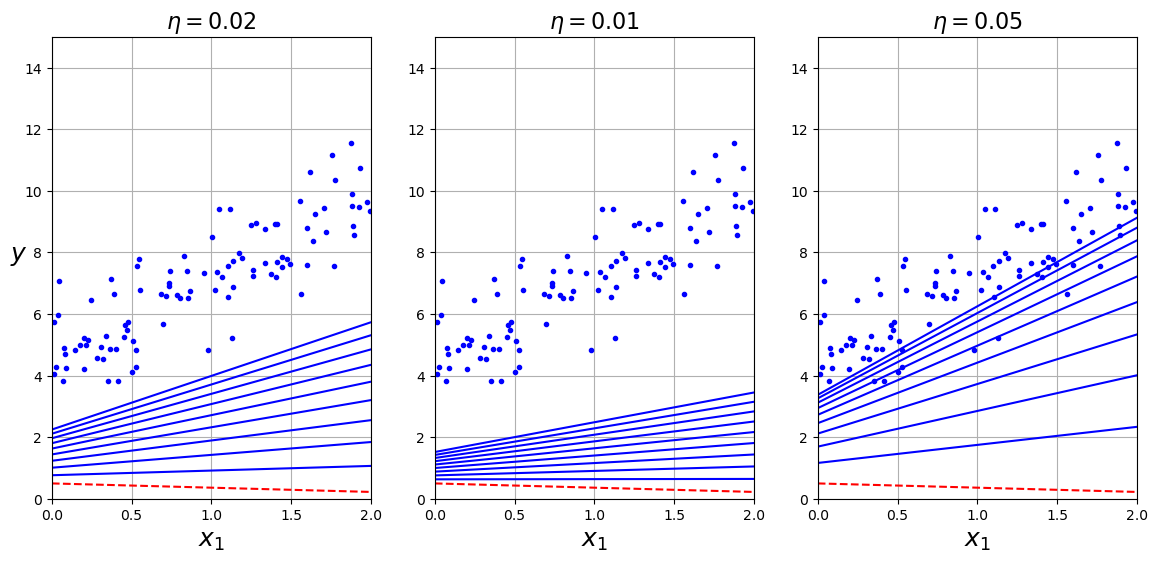

In [13]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(14, 6))
plt.subplot(131); plot_gradient_descent(theta=theta, eta=0.02)
plt.grid(True)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta=theta, eta=0.01)
plt.grid(True)
plt.subplot(133); plot_gradient_descent(theta=theta, eta=0.05, theta_path=theta_path_bgd)
plt.grid(True)
plt.show()

<h3>Stochastic Gradient Descent</h3>

Stochastic Gradient Descent (SGD) is a faster optimization algorithm in machine learning, which updates model parameters using random individual data points or small data batches for speed but with added noise.

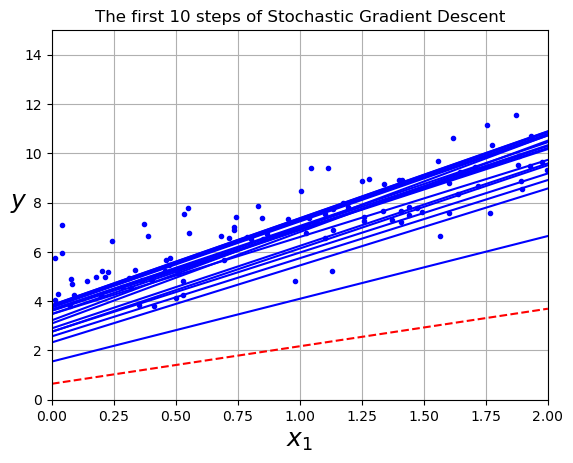

In [14]:
theta_path_sgd = []
m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):        
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(
                X_new,
                y_predict,
                style
            )
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(
    X,
    y,
    'b.'
)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title('The first 10 steps of Stochastic Gradient Descent')
plt.grid(True)
plt.show()

In [15]:
theta

array([[4.51732588],
       [2.73554647]])

`SGDRegressor` implements linear regression using Stochastic Gradient Descent (SGD) as the optimization algorithm.

In [16]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    penalty=None,
    eta0=0.1,
    random_state=42
)
sgd_reg.fit(X, y.ravel())  # use y.ravel() to a flattened (1D) array for model fitting

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51597849]), array([2.71884482]))

<h3>Mini-batch Gradient Descent</h3>

Mini-Batch Gradient Descent is a compromise between Batch and Stochastic Gradient Descent, updating model parameters with the average gradient of small random subsets of data.

In [18]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20
t0, t1 = 200, 1000

def learning_scedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_scedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [19]:
theta

array([[4.49520316],
       [2.63745521]])

In [20]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

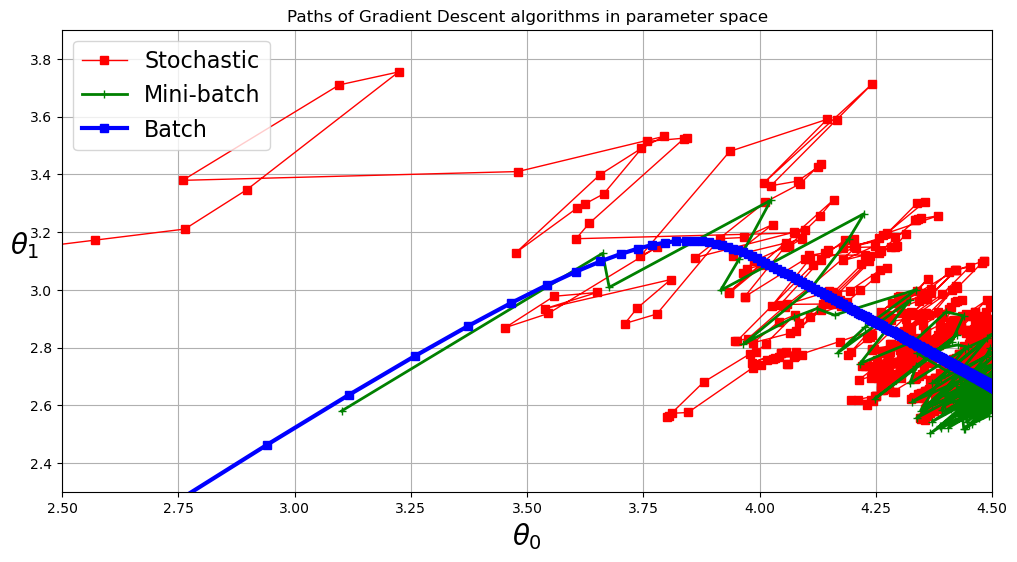

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(
    theta_path_sgd[:, 0],
    theta_path_sgd[:, 1],
    'r-s',
    linewidth=1,
    label='Stochastic'
)
plt.plot(
    theta_path_mgd[:, 0],
    theta_path_mgd[:, 1],
    'g-+',
    linewidth=2,
    label='Mini-batch'
)
plt.plot(
    theta_path_bgd[:, 0],
    theta_path_bgd[:, 1],
    'b-s',
    linewidth=3,
    label='Batch'
)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', rotation=0, fontsize=20)
plt.legend(loc='upper left', fontsize=16)
plt.title('Paths of Gradient Descent algorithms in parameter space')
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.grid(True)
plt.show()